In [3]:
# What Is Multiple Linear Regression (MLR)?
# Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable.

In [4]:
#Importing libraries numpy and pandas.
import numpy as np
import pandas as pd

# Using pandas library we import our required dataset.
df = pd.read_csv ('data_for_Ann_model.csv')
print (df)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data_for_Ann_model.csv'

In [ ]:
# Full summary of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BCS class               374 non-null    int64  
 1   Hardness                374 non-null    float64
 2   floating lag time(sec)  374 non-null    int64  
 3   Drug release(%)         374 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.8 KB


In [ ]:
# Description of our data in the DataFrame.
df.describe()


,BCS class,Hardness,floating lag time(sec),Drug release(%)
count,374.000000,374.000000,374.000000,374.000000
mean,2.441176,5.149198,208.061497,65.349701
std,0.979968,1.475533,512.481399,23.369280
min,1.000000,1.000000,3.000000,5.315900
25%,2.000000,4.500000,42.000000,46.090000
50%,2.000000,5.000000,75.000000,66.195000
75%,3.000000,5.500000,154.000000,85.260000
max,4.000000,10.900000,4380.000000,104.120000


In [ ]:
# Mean of Drug release(%)
mean = df['Drug release(%)'].mean(skipna=True)
print(mean)


65.34970101604279


In [ ]:
# Defining Variables X and y.
X = df[['BCS class','Hardness']]
y = df[['floating lag time(sec)','Drug release(%)']]

In [ ]:
# creating train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
#Using Multilinear Regression
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# creating a regression model
model = LinearRegression()
# fitting the model
model.fit(X_train,y_train)
# making predictions
predictions = model.predict(X_test)


In [ ]:
# Training and Testing score.
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.022255992305792116
Test Score:  0.007341804741029134


In [ ]:
#Predicting the Test set result;  
y_pred= regressor.predict(X_test) 

In [ ]:
# Predicting our required variables i.e floating lag time(sec) & Drug release(%) from BCS class and Hardness
predictedDrugrelease = regressor.predict([[1,5.1]])
print("[floating lag time(sec),Drug release(%)] : ",predictedDrugrelease)

[floating lag time(sec),Drug release(%)] :  [[79.21057213 62.01491942]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


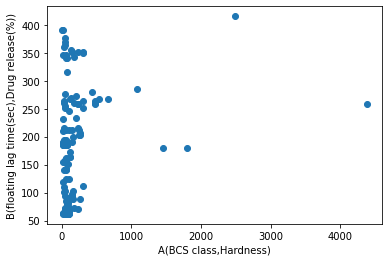

In [ ]:
#Plot the Results
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('A(BCS class,Hardness)');
plt.ylabel('B(floating lag time(sec),Drug release(%))');